<a href="https://colab.research.google.com/github/HEVNAGI/CSST106-CS4B/blob/main/EXERSICE_IMAGE_PROCESSING_TECHNIQUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAGPANTAY NINO JANDEL C.

BSCS 4B

MR BERNARDINO

1. Install OpenCV

In [ ]:
!pip install opencv-python-headless

2. Import Libraries

In [1]:
import  cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(img,title="Image"):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_images(img1,img2, title1="image 1", title2="image 2"):
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()

3. Load Image

Saving PONJAP.jpg to PONJAP.jpg


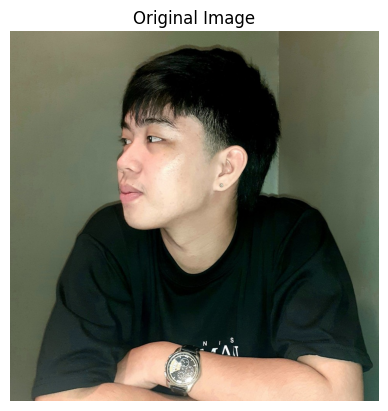

In [2]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()

#Convert to OpenCv Format
image_path = next(iter(uploaded))
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

display_image(image, "Original Image")

EXERCISE 1: SCALING AND ROTATION

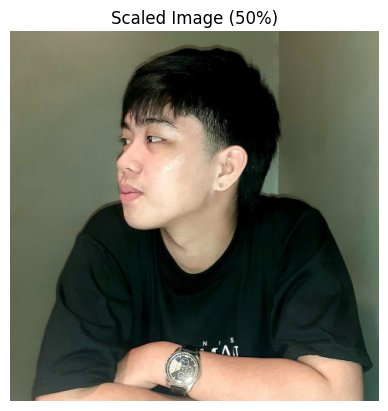

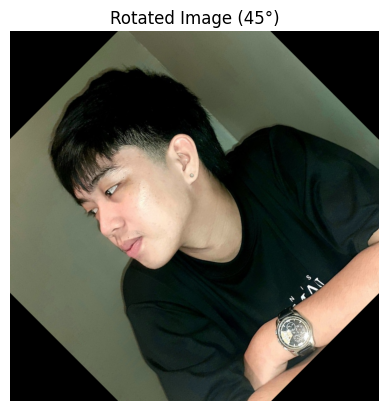

In [3]:
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scaled_img = cv2.resize(img,
(int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
    return scaled_img


def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, matrix, (width, height))
    return rotated_img


scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image (50%)")

rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image (45°)")




EXERSICE 2: BLURING TECHNIQUES

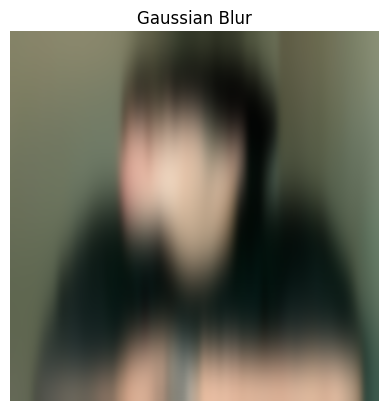

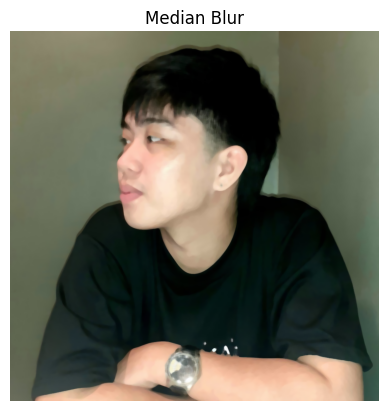

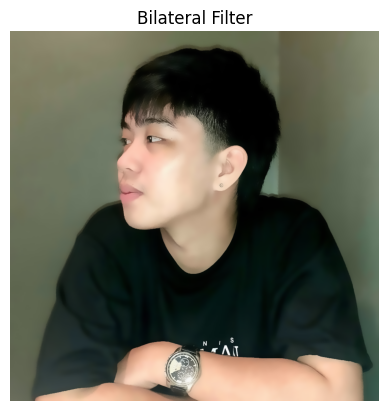

In [4]:
gaussian_blur = cv2.GaussianBlur(image, (45,455),0)
display_image(gaussian_blur, "Gaussian Blur")

median_blur = cv2.medianBlur(image,9)
display_image(median_blur, "Median Blur")

bilaterial_filter = cv2.bilateralFilter(image, 18, 75, 75)
display_image(bilaterial_filter, "Bilateral Filter")


3. Edge Detection Using Canny

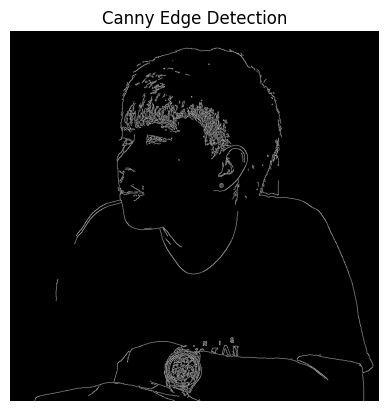

In [5]:
edges = cv2.Canny(image, 100, 200)
display_image(edges, "Canny Edge Detection")


Exercise 4: Basic Image Processor (Interactive)

Enter action (scale, rotate, gaussian_blur, median_blur, canny): SCALE


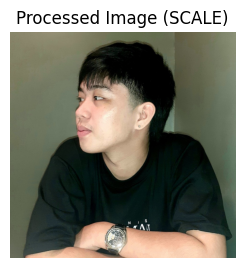

'\n\nThis allows users to enter their desired transformation interactively (via the\ninput() function). It processes the image and displays both the original and transformed\nversions side by side.\n'

In [6]:
def process_image(image, action):
  if action == 'scale':
      return scale_image(image, 0.5)
  elif action == 'rotate':
      return rotate_image(image, 45)
  elif action == 'gaussian_blur':
      return cv2.GaussianBlur(image, (5, 5), 0)
  elif action == 'median_blur':
      return cv2.medianBlur(image, 5)
  elif action == 'canny':
      return cv2.Canny(image, 100, 200)
  else:
      return image

"""
process_image(): This function allows users to specify an image transformation (scaling,
rotation, blurring, or edge detection). Depending on the action passed, it will apply the
corresponding image processing technique and return the processed image.
"""

action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny): ")
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")
"""

This allows users to enter their desired transformation interactively (via the
input() function). It processes the image and displays both the original and transformed
versions side by side.
"""


Exercise 5: Comparison of Filtering Techniques

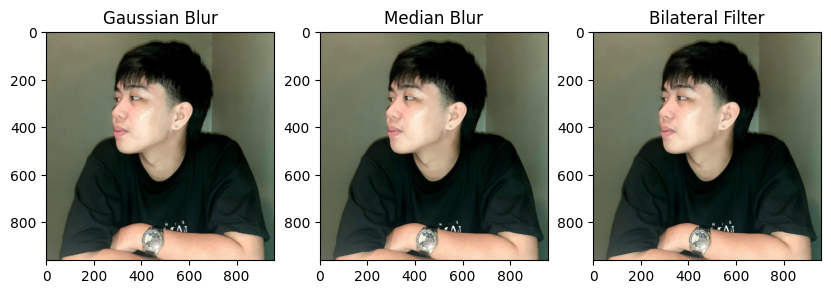

In [7]:
# Applying Gaussian, Median, and Bilateral filters
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)
"""
cv2.bilateralFilter(): This filter smooths the image while keeping edges sharp, unlike
Gaussian or median filters. It’s useful for reducing noise while preserving details.
"""
# Display the results for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.show()

SOBEL EDGE DETECTION

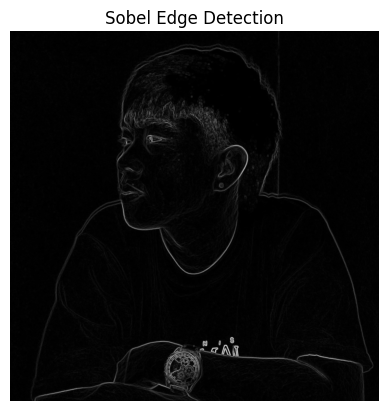

In [8]:
# Sobel Edge Detection
def sobel_edge_detection(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Sobel edge detection in the x direction
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)

    # Sobel edge detection in the y direction
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

    # Combine the two gradients
    sobel_combined = cv2.magnitude(sobelx, sobely)

    return sobel_combined

# Apply Sobel edge detection to the uploaded image
sobel_edges = sobel_edge_detection(image)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()


LAPLACIAN EDGE DETECTION

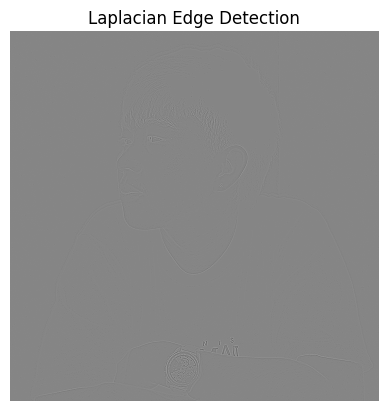

In [9]:
# Laplacian Edge Detection
def laplacian_edge_detection(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Laplacian operator
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)

    return laplacian

# Apply Laplacian edge detection to the uploaded image
laplacian_edges = laplacian_edge_detection(image)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()

PREWITT EDGE DETECTION

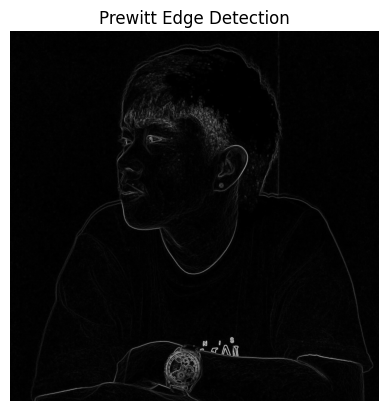

In [10]:
def prewitt_edge_detection(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Prewitt operator kernels for x and y directions
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)

    # Applying the Prewitt operator
    prewittx = cv2.filter2D(gray, cv2.CV_64F, kernelx)
    prewitty = cv2.filter2D(gray, cv2.CV_64F, kernely)

    # Combine the x and y gradients by converting to floating point
    prewitt_combined = cv2.magnitude(prewittx, prewitty)

    return prewitt_combined

# Apply Prewitt edge detection to the uploaded image
prewitt_edges = prewitt_edge_detection(image)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')
plt.show()

BILATERAL FILTER

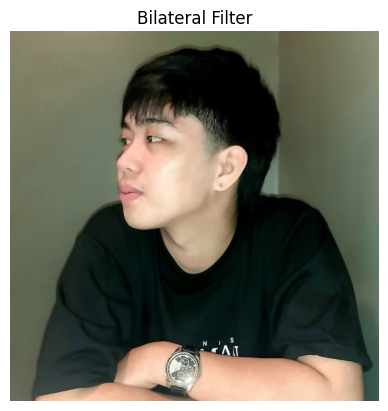

In [11]:
def bilateral_blur(img):
    bilateral = cv2.bilateralFilter(img, 9, 75, 75)
    return bilateral

# Apply Bilateral filter to the uploaded image
bilateral_blurred = bilateral_blur(image)
plt.imshow(cv2.cvtColor(bilateral_blurred, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')
plt.show()

BOX FILTER

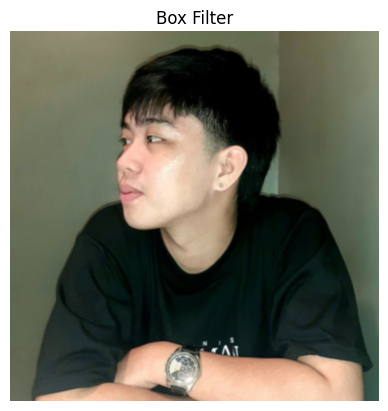

In [12]:
# Box Filter
def box_blur(img):
    box = cv2.boxFilter(img, -1, (5, 5))
    return box

# Apply Box filter to the uploaded image
box_blurred = box_blur(image)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')
plt.show()

MOTION BLUR

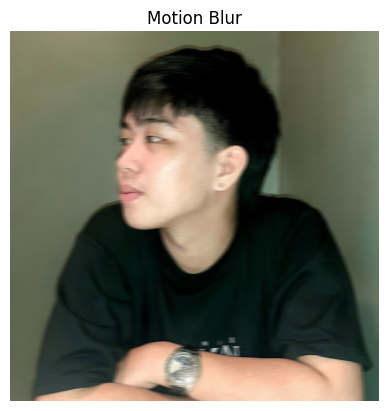

In [13]:
# Motion Blur
def motion_blur(img):
    # Create motion blur kernel (size 15x15)
    kernel_size = 15
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel = kernel / kernel_size

    # Apply motion blur
    motion_blurred = cv2.filter2D(img, -1, kernel)
    return motion_blurred

# Apply Motion blur to the uploaded image
motion_blurred = motion_blur(image)
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')
plt.show()

UNSHARP MASK (SHARPENING)

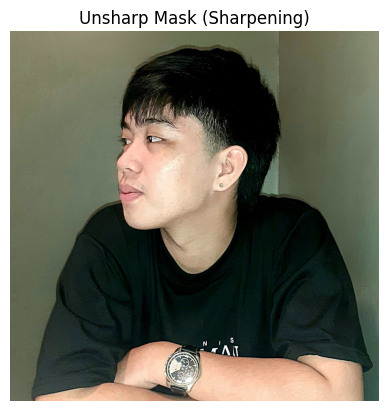

In [14]:
# Unsharp Masking (Sharpening)
def unsharp_mask(img):
    # Create a Gaussian blur version of the image
    blurred = cv2.GaussianBlur(img, (9, 9), 10.0)

    # Sharpen by adding the difference between the original and the blurred image
    sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
    return sharpened

# Apply Unsharp Masking to the uploaded image
sharpened_image = unsharp_mask(image)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')
plt.show()

Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_blur, unsharp_mask)UNSHARP MASK


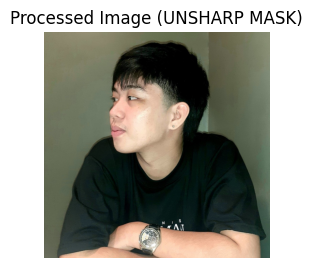

In [15]:
# Update process_image function to include new blurring techniques
def process_image(img, action):
    if action == 'scale':
        return scale_image(img, 0.5)
    elif action == 'rotate':
        return rotate_image(img, 45)
    elif action == 'gaussian_blur':
        return cv2.GaussianBlur(img, (5, 5), 0)
    elif action == 'median_blur':
        return cv2.medianBlur(img, 5)
    elif action == 'canny':
        return cv2.Canny(img, 100, 200)
    elif action == 'sobel':
        return sobel_edge_detection(img)
    elif action == 'laplacian':
        return laplacian_edge_detection(img)
    elif action == 'prewitt':
        return prewitt_edge_detection(img)
    elif action == 'bilateral_blur':
        return bilateral_blur(img)
    elif action == 'box_blur':
        return box_blur(img)
    elif action == 'motion_blur':
        return motion_blur(img)
    elif action == 'unsharp_mask':
        return unsharp_mask(img)
    else:
        return img

# Add new blurring options for interactive processing
action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny, sobel, laplacian, prewitt, bilateral_blur, box_blur, motion_blur, unsharp_mask)")
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")

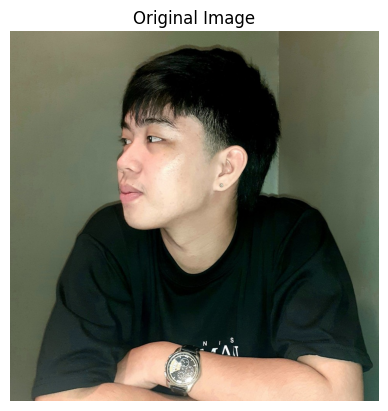

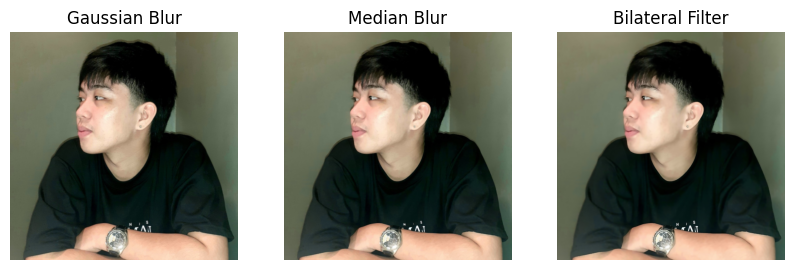

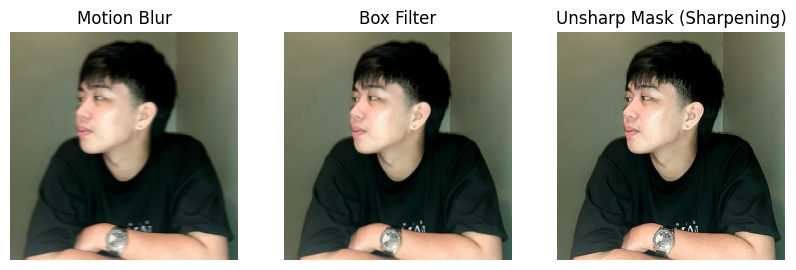

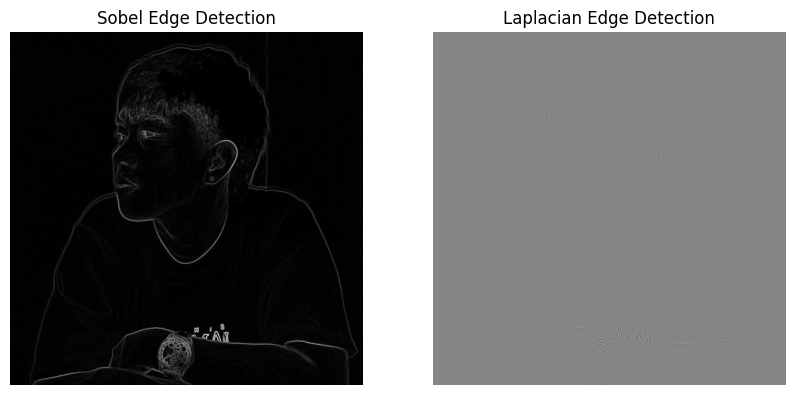

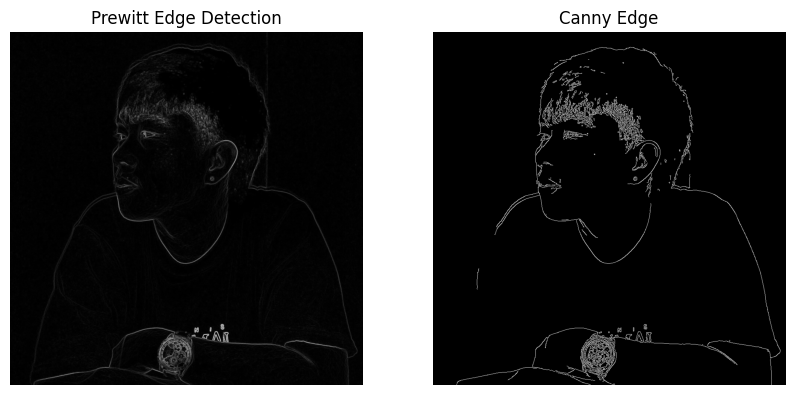

In [20]:
display_image(image, "Original Image")


#Display the results for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")
plt.axis('off')
plt.show()



#Display the results for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
#Apply Motion blur to the uploaded image
plt.imshow(cv2.cvtColor(motion_blurred, cv2.COLOR_BGR2RGB))
plt.title("Motion Blur")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(box_blurred, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Unsharp Mask (Sharpening)")
plt.axis('off')
plt.show()


#Display the results for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_edges, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(prewitt_edges, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')



plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge")
plt.axis('off')
plt.show()